# Kinematic analysis of a knee prosthesis

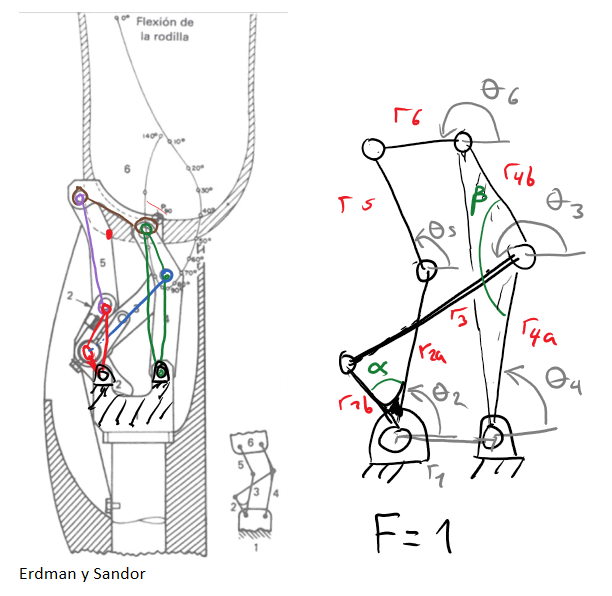

## Vector diagram

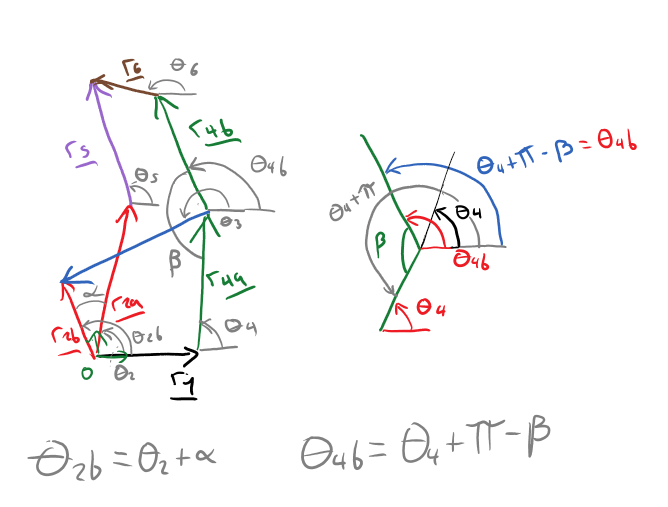

## Variables and parameters

Main variable: $\theta_{6}$

Secondary variables: $\theta_2,\theta_3,\theta_4,\theta_5$

Parameters: $r_1,r_{2a},r_{2b},r_{3},r_{4a},r_{4b},r_{5},r_{6},\alpha,\beta$

$\theta_{2b} = \theta_{2} + \alpha$

$\theta_{4b} = \theta_{4} + \pi - \beta$

## Vector equations

## Vector equations

$\overrightarrow{r_{2a}} + \overrightarrow{r_{5}} - \overrightarrow{r_{6}} - \overrightarrow{r_{4b}} - \overrightarrow{r_{4a}} - \overrightarrow{r_{1}} = 0$ (1)

$\overrightarrow{r_{2b}} - \overrightarrow{r_{3}} - \overrightarrow{r_{4a}} - \overrightarrow{r_{1}} = 0$ (2)

## Scalar equations

...

## Numerical methods implementation

### import modules

In [13]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Function definition

In [14]:
def knee(initCond,params):
    # main variable
    th6 = params[0]
    # parameters
    r1 = params[1]
    r2a = params[2]
    r2b = params[3]
    r3 = params[4]
    r4a = params[5]
    r4b = params[6]
    r5 = params[7]
    r6 = params[8]
    alpha = params[9]
    beta = params[10]
    
    # initial conditions
    th2 = initCond[0]
    th3 = initCond[1]
    th4 = initCond[2]
    th5 = initCond[3]  
    
    Y = np.zeros(4)
    Y[0] = r2a*np.cos(th2) + r5*np.cos(th5) - r6*np.cos(th6) - r4b*np.cos(th4+np.pi-beta) - r4a*np.cos(th4) - r1
    Y[1] = r2a*np.sin(th2) + r5*np.sin(th5) - r6*np.sin(th6) - r4b*np.sin(th4+np.pi-beta) - r4a*np.sin(th4)
    Y[2] = r2b*np.cos(th2+alpha) - r3*np.cos(th3) - r4a*np.cos(th4) - r1
    Y[3] = r2b*np.sin(th2+alpha) - r3*np.sin(th3) - r4a*np.sin(th4)
    return Y

### Function test

We can obtain parameter values, as well as initial conditions from the graphic analysis method:

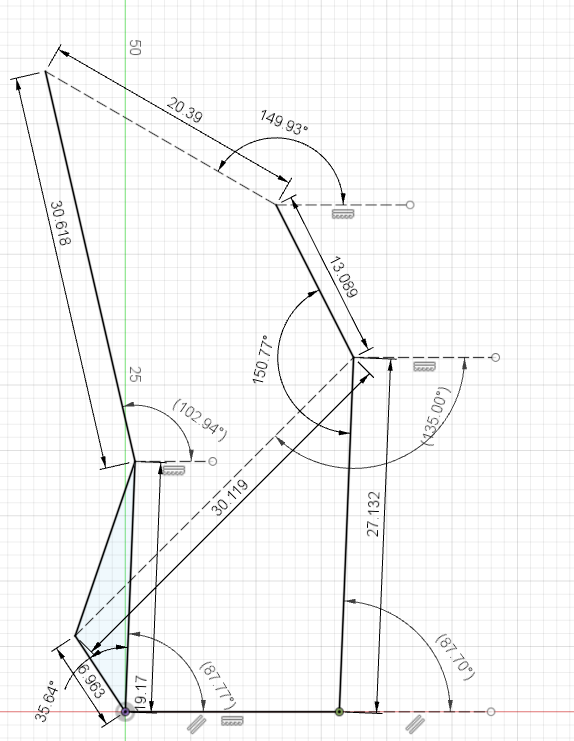

In [15]:
# parameter definition
r1 = 16.373
r2a = 19.17
r2b = 6.963
r3 = 30.119
r4a = 27.132
r4b = 13.089
r5 = 30.618
r6 = 20.39
alpha = np.deg2rad(35.64)
beta = np.deg2rad(150.77)

# main variable initial value
th6 = np.deg2rad(149.93)

# initial conditions
th2Ini = np.deg2rad(87.77)
th3Ini = np.deg2rad(360-135)
th4Ini = np.deg2rad(87.70)
th5Ini = np.deg2rad(102.94)

parameters = [th6,r1,r2a,r2b,r3,r4a,r4b,r5,r6,alpha,beta]
x0 = [th2Ini,th3Ini,th4Ini,th5Ini]

print(knee(x0,parameters))

[ 0.0015803  -0.00040282  0.00148144 -0.00041659]


In [16]:
q,info,exitflag,mensaje = fsolve(knee,x0,args = parameters,full_output = True)
print("solucion = ",np.rad2deg(q),"\n",exitflag,"\n",mensaje)

solucion =  [ 87.77944316 225.0028801   87.70115616 102.93847493] 
 1 
 The solution converged.
